# Moderated Regression

## Exercise 1: The Dataset

Since this chapter didn’t introduce many new concepts, we will also take some time to review and practice skills you've learned in previous chapters.

Today’s dataset includes various variables related to student stress factors and mental health. It is included in the teaching materials, so you can either load it directly from your files, or by providing the URL:

- `pd.read_csv("data/StressLevelDataset.csv", delimiter=',')`
- `pd.read_csv("https://raw.githubusercontent.com/mibur1/psy111/main/book/statistics/4_Moderated_Reg/data/StressLevelDataset.csv", delimiter=',')`

Your research question will be: **Does social support moderate the effect of anxiety on self-esteem?**

1. Load and explore the dataset.
2. Select only the variables relevant to your research question (subset the dataset), and save it to a new DataFrame. Make sure to create a deep copy by using `.copy()`
3. Create a correlation matrix for the three variables of interest (anxiety, social support, and self-esteem).

   anxiety_level  self_esteem  mental_health_history  depression  headache  \
0             14           20                      0          11         2   
1             15            8                      1          15         5   
2             12           18                      1          14         2   
3             16           12                      1          15         4   
4             16           28                      0           7         2   

   blood_pressure  sleep_quality  breathing_problem  noise_level  \
0               1              2                  4            2   
1               3              1                  4            3   
2               1              2                  2            2   
3               3              1                  3            4   
4               3              5                  1            3   

   living_conditions  ...  basic_needs  academic_performance  study_load  \
0                  3  ...            2        

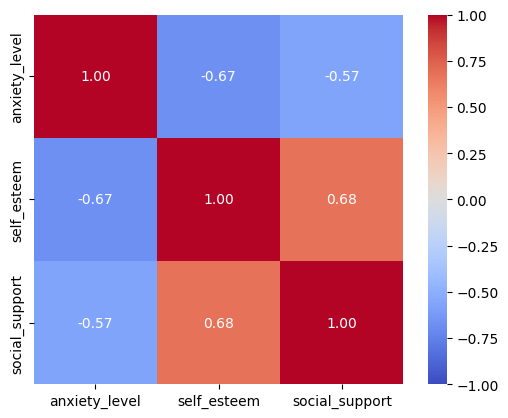

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("https://raw.githubusercontent.com/mibur1/psy111/main/book/statistics/4_Moderated_Reg/data/StressLevelDataset.csv", delimiter=',')
print(df.head())
df_small=df[['anxiety_level', 'self_esteem', 'social_support']].copy()

print(df_small.head())
print(df_small.describe())
corr_matrix = df_small.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True, center=0, vmin=-1, vmax=1, fmt=".2f");

## Exercise 2
1. Center the variables anxiety_level and self_esteem by subtracting their mean values. Save the centered variables to new columns in your DataFrame.
2. Perform a moderated regression modelling the main effects of, as well as interaction effects between, `anxiety_centered` and `social_support` on `self_esteem_centered`.
3. Take some time to interpret the outputs (similar to as shown in the previous section).

*Warning: `social_support` is NOT a continuous variable. You can, for example, use dummy coding for your model.*

In [8]:
import statsmodels.formula.api as smf

df_small['anxiety_centered'] = df_small['anxiety_level'] - df_small['anxiety_level'].mean()
df_small['self_esteem_centered'] = df_small['self_esteem'] - df_small['self_esteem'].mean()

model = smf.ols('self_esteem_centered ~ anxiety_centered * C(social_support, Treatment(reference=0))', data=df_small)
results = model.fit()
print(results.summary())

                             OLS Regression Results                             
Dep. Variable:     self_esteem_centered   R-squared:                       0.658
Model:                              OLS   Adj. R-squared:                  0.655
Method:                   Least Squares   F-statistic:                     299.6
Date:                  Tue, 04 Feb 2025   Prob (F-statistic):          5.40e-249
Time:                          20:24:33   Log-Likelihood:                -3381.0
No. Observations:                  1100   AIC:                             6778.
Df Residuals:                      1092   BIC:                             6818.
Df Model:                             7                                         
Covariance Type:              nonrobust                                         
                                                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

## Exercise 3: Quiz

Please answer the following questions:

In [9]:
from jupyterquiz import display_quiz

display_quiz('https://raw.githubusercontent.com/mibur1/psy111/main/book/solutions/quiz/question1.json')
display_quiz('https://raw.githubusercontent.com/mibur1/psy111/main/book/solutions/quiz/question2.json')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Voluntary exercise

Create a scatterplot to visualize the relationship between `anxiety` and `self_esteem`. Adding a linear regression line. Use `social_support` as the hue to differentiate groups.

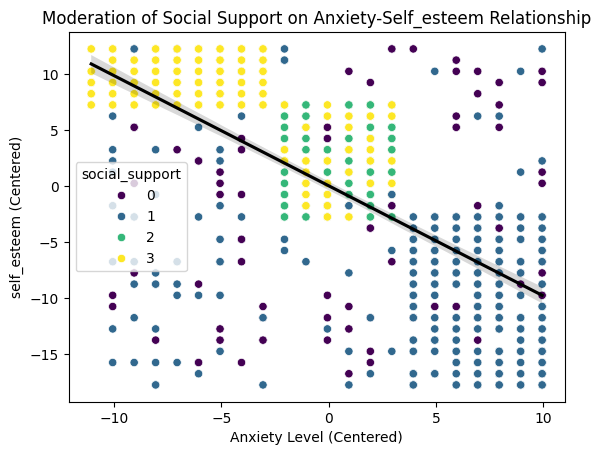

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
sns.scatterplot(data=df_small, x='anxiety_centered', y='self_esteem_centered', hue='social_support', palette='viridis', legend='full', ax=ax)
sns.regplot(data=df_small, x='anxiety_centered', y='self_esteem_centered', scatter=False, color='black', ax=ax)

ax.set_xlabel('Anxiety Level (Centered)')
ax.set_ylabel('self_esteem (Centered)')
ax.set_title('Moderation of Social Support on Anxiety-Self_esteem Relationship')

plt.show()